In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image as im
from pathlib import Path

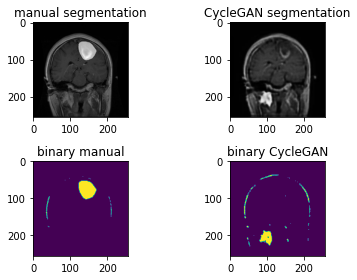

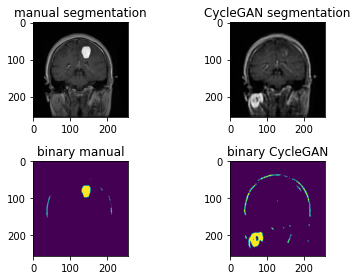

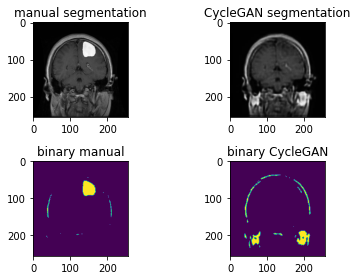

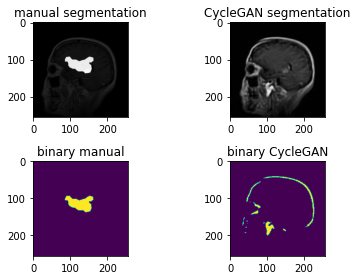

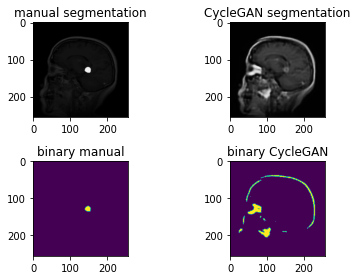

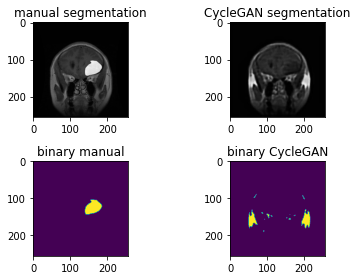

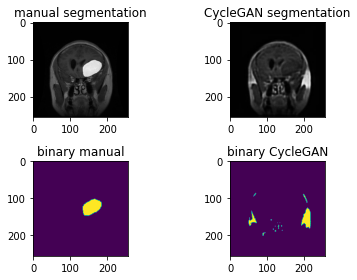

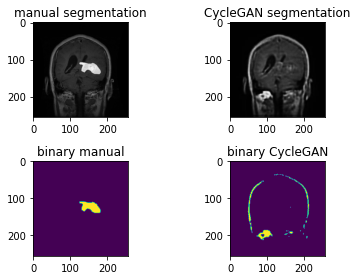

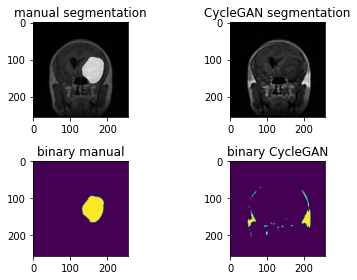

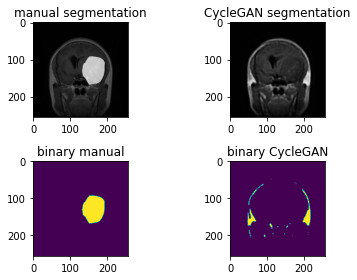

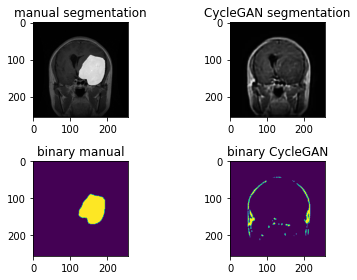

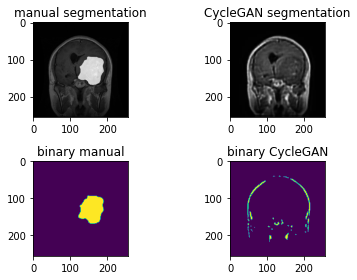

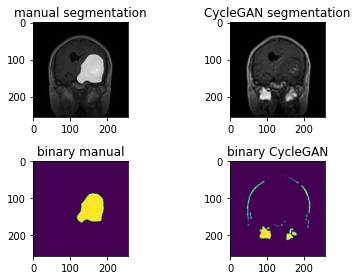

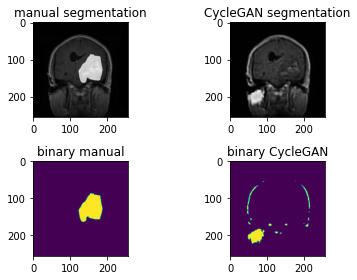

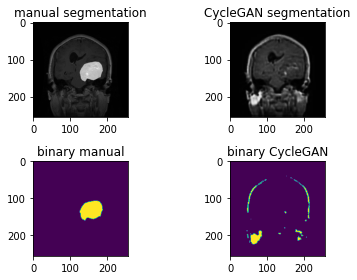

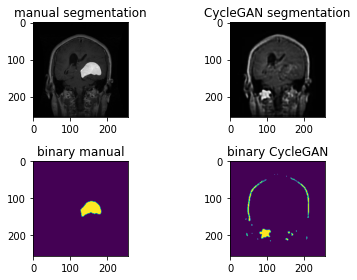

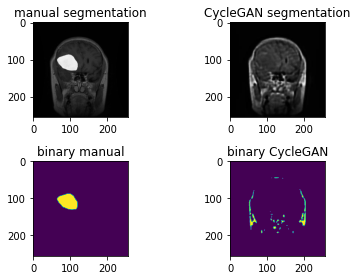

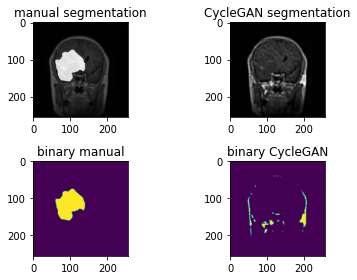

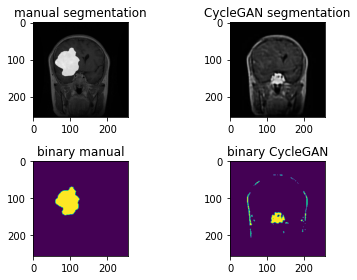

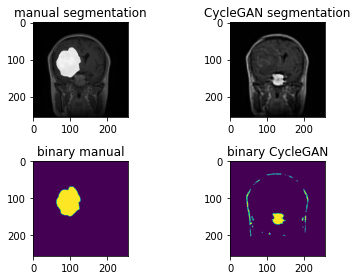

0.0025176375820358697


In [10]:
def dice_score(a: np.ndarray, b: np.ndarray):
    a, b = a.flatten(), b.flatten()
    intersection = np.logical_and(a, b).sum()
    union = np.logical_or(a, b).sum()
    return 2. * intersection/union

orig_paths = list(Path('testB/').iterdir())
gen_paths = list(Path('test20-25/').iterdir())
orig_paths.sort()
gen_paths.sort()

if len(orig_paths) != len(orig_paths):
    raise Exception('Different count of original and generated images!')

scores = []
for o, g in zip(orig_paths, gen_paths):
    orig = im.open(o).resize((256, 256))
    orig = np.asarray(orig, dtype=np.uint8)[:,:,0]
    gen = im.open(g)
    gen = np.asarray(gen, dtype=np.uint8)[:,:,0]

    bin_orig = orig > 120
    bin_gen = gen > 120
    scores.append((dice_score(bin_orig, bin_gen)))
    
    _, axarr = plt.subplots(2, 2)
    axarr[0,0].imshow(orig, cmap='gray')
    axarr[0,0].set_title('manual segmentation')
    axarr[0,1].imshow(gen, cmap='gray')
    axarr[0,1].set_title('CycleGAN segmentation')
    axarr[1,0].imshow(bin_orig)
    axarr[1,0].set_title('binary manual')
    axarr[1,1].imshow(bin_gen)
    axarr[1,1].set_title('binary CycleGAN')
    plt.tight_layout()
    plt.show()

scores = np.array(scores).mean()
print(scores)